# Setup

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("survey.csv")
print(df.columns)

Index(['Timestamp', 'What age group are you in?', 'What is your gender',
       'What is your occupation?', 'Industry', 'Where are you from?',
       'Where did we meet', 'When did we meet?', 'How did we meet?',
       'How long is your trip?', 'Who are you travelling with?',
       'Why did you decide to travel?', 'What kind of trip is this?',
       'How many countries are you travelling to on this trip?',
       'Number countries normalised', 'How is it comparing to expectations?',
       'Feel free to leave your name/contact and a little note for me! Would love to stay in touch 🥰'],
      dtype='object')


# Introduction

## Motivation

## Data collection
There were a total of 73 responses collected over five countries and 12 weeks. 

## Emoji legend

💡 - idea or insight \
🌿 - anecdotal observation \
🤔 - possible bias \
📕 - story

# Respondent Backgrounds
Who was the average person I met while I was travelling?

## Country of meeting
I visited five countries while I was travelling. Here is the split of respondents by country where we met:

<AxesSubplot:title={'center':'Which country did we meet'}>

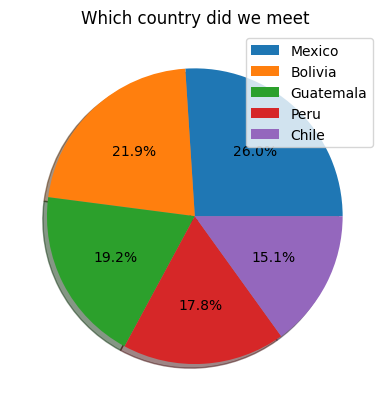

In [4]:
south_countries = ["Peru", "Bolivia", "Chile"]
central_countries = ["Guatemala", "Mexico"]
south_df = df.loc[df['Where did we meet'].isin(south_countries)]
central_df = df.loc[df['Where did we meet'].isin(central_countries)]
df['south_or_central'] = np.where(df['Where did we meet'].isin(south_countries), "South", "Central")
df["Where did we meet"].value_counts(dropna=True).plot(kind="pie", autopct='%1.1f%%', shadow=True, legend=True, title='Which country did we meet', ylabel='', labeldistance=None)

🤔 There is a negative bias both at the start and end of the trip. At the beginning, I was a lot more shy at both meeting people and asking them to fill out the survey. By the end, I got so into the flow of travelling I often forgot to send it out \
🤔 I was also with friends in Peru so that contributed to meeting less people

### Time spent in country vs number of people met
Let's see how this correlates with time spent in the country

<AxesSubplot:xlabel='Country'>

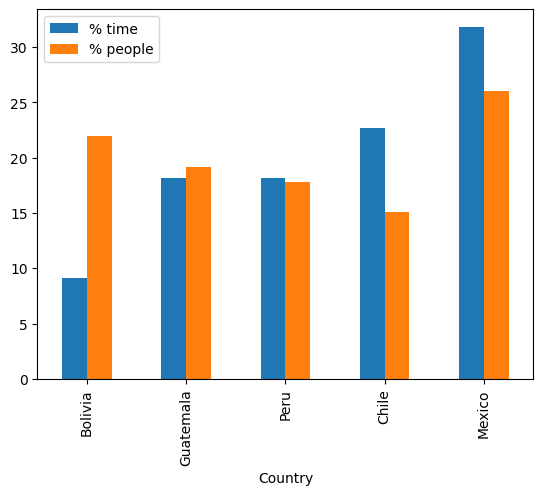

In [5]:
time_country_df = pd.DataFrame(data={'Country': ['Peru', 'Bolivia', 'Chile', 'Guatemala', 'Mexico'], 'Weeks': [2, 1, 2.5, 2, 3.5]})
time_country_df['% time'] = (time_country_df['Weeks'] / time_country_df['Weeks'].sum()) * 100

count_country_df = (df["Where did we meet"].value_counts(dropna=True).reset_index(name='Number of people')).rename(columns={"Where did we meet" : "Country"})
count_country_df['% people'] = (count_country_df['Number of people'] / count_country_df['Number of people'].sum()) * 100
time_vs_count_country_df = pd.merge(time_country_df, count_country_df, on="Country", how="outer").sort_values(by="Weeks", ascending=True)
time_vs_count_country_df.plot(x="Country", y=["% time", "% people"], kind="bar")

There is no pattern here! How exciting! \
The % of people met and time spent are relatively in line for Peru and Guatemala.

💡 Bolivia has the highest people/time ratio. It was the start of my solo-travelling after saying goodbye to friends in Peru, so I was motivated to make new friends. I also spent half of my time there on a 10-people tour through the Uyuni salt flats to get to the northern Chilean deserts. So maybe an insight here, if you're looking for company, join a multi-day excursion :) \
🤔 Chile has the lowest people/time ratio. I met *a lot* of people while hiking the W Trek in Patagonia, so I think this is a data collection issue. To be fair, I was sharing the survey with people who then had a 5-day trek with no signal ahead of them, so that's where the drop-off could have happened. Also, I ran into my deportation issue right after Chile, so I retrospectively sent out the survey a little later when I'd recovered from the stress. Time in between meeting and sending the survey is a big factor in it being filled out.

## Country of origin

Surprisingly, most of the answers were from the UK and USA. There might be a bias here from the people I ended up connecting with cause we are from the same country.

🌿 I really thought the highest answer would be Dutch people cause I met so many damn Dutchies out there. But maybe they don't like answering surveys :( \
🤔 Asians were quite rare, as you can see from the responses. Whenever I met an asian person I would make an effort to say hi!

<AxesSubplot:title={'center':'Country'}, xlabel='Where are you from?'>

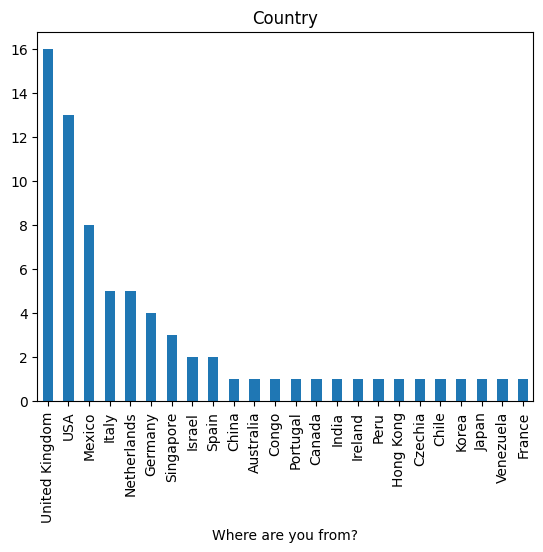

In [6]:
df["Where are you from?"].value_counts(dropna=True).plot(kind="bar", title='Country')

### Locals vs foreigners

I was really hoping to meet a big mix of people while I travelled. One part of that was meeting local people as well as other travellers/foreigners. It proved to be difficult when living in hostels and having the most basic of Spanish.

<AxesSubplot:title={'center':'Local'}>

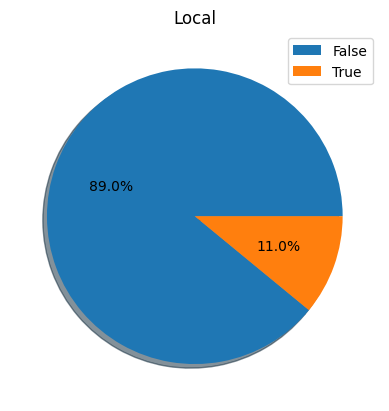

In [7]:
df['local'] = (df['Where did we meet'] == df['Where are you from?'])
df["local"].value_counts(dropna=False).plot(kind="pie", autopct='%1.1f%%', shadow=True, legend=True, title='Local', ylabel='', labeldistance=None)

💡 TLDR: if you travel like I did (i.e. in hostels and with basic spanish), you're mostly going to meet travellers.

Text(0.5, 0, 'Number of locals respondents')

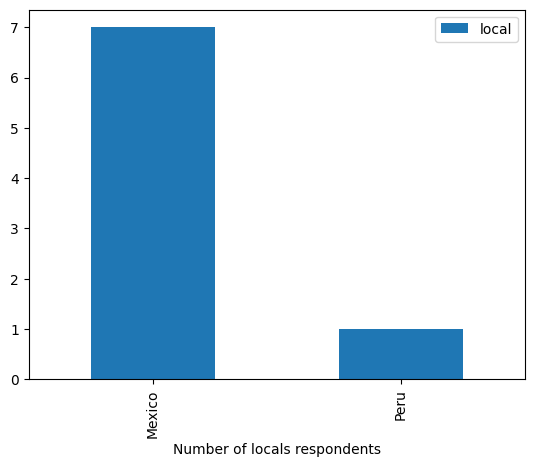

In [8]:
local_df = df.loc[df['local'] == True]
ax = local_df.groupby(['Where did we meet']).sum().plot(kind='bar', y='local')
ax.set_xlabel("Number of locals respondents")

💡 I made the most local friends in Mexico. The main driver is English is more widely spoken in Mexico, so I was able to make more connections (200 days of Duolingo later and my spanish is still no bueno). \
🌿 I observed that Mexicans were the ones that did internal travel the most. Mexico was the only country where I would meet local people also travelling and staying in hostels. This is probably because Mexico has a relatively higher GDP, especially in the north of the country (I was in South/East Mexico so it makes sense that they were also visiting), and the country is big af so there's more to travel and see. \
🤔 There's definitely some people who are not represented here. For example, the Chilean doctor I met while hiking to Macchu Picchu who invited me to stay with her in Santiago and brought me to meet her family (big love Sophie💖💖), and the other Peruvians I met on a random night hanging out at an artist's studio. \
📕 Massive shoutout to some of the wonderful people I met, particularly Carlos from Chihuahua, Mexico. We met in a hostel in Oaxaca when he recognised my accent after spending a year in Singapore and became friends really quickly. I went to visit him in his hometown where he picked us up at the airport and planned a whole weekend of sightseeing, and I even got to have lunch with his mom!

## Gender

How cool is it that there is an exact split of gender!! It reflects my anecdotal experience too.

🤔 There is a possible unconscious bias here to be more likely to approach other women. Who knows, social conditioning or psychological safety in a new environment

P.S. shout out to my one non-binary respondent! Thanks for a great few days in Zipolite <3 

<AxesSubplot:title={'center':'Gender distribution'}>

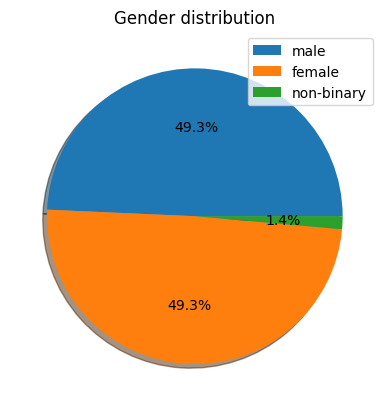

In [9]:
df["What is your gender"].value_counts(dropna=True).plot(kind="pie", autopct='%1.1f%%', shadow=True, legend=True, title='Gender distribution', ylabel='', labeldistance=None)

### Age
Unsurprisingly, the bulk of the responses were in the 20-40 range. In general, I was slightly older than the average traveller. I wish I took more discrete age readings so I could figure out the median age. 

🌿 The people that I met in the 50-60 age groups were usually on post-retirement trips.

📕 I met a British woman on a speedboat to Isla del Sol in Bolivia who was at the start of a solo 7-month trip that she had been dreaming about for 4 years over Covid. She quit her job working at Lloyds bank where she had been for most of her life. When I asked her what her friends and family's response was, she said "they all thought I was crazy". Hope she's having the time of her life!

📕 I also met a couple from Chennai, India who lived in the UK for many years before moving back to India to take care of their parents. They were really inspiring and told me that this world tour was the start of them living life for themselves again after fulfilling their responsibilities, and had gone on incredible adventures like ice diving in Antartica. I hope that my parents will also seek adventure like this.

📕 The youngest people I met were two 18-year olds from Bristol, England, while climbing up Volcan de Fuego in Guatemala. They were super cool and it kind of shook me how mature they were they were for their age. If you dropped me in Guatemala at 18 I think I would have freaked out and gone into feotal position. One positive thing about European culture is that parents encourage their children to be independent from a young age, and they tend to have a lot more self-confidence and be more worldy as a result.

<AxesSubplot:title={'center':'Age group'}>

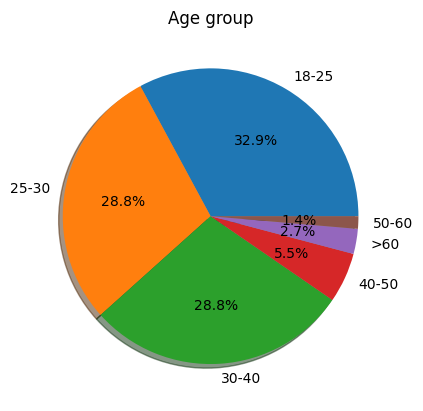

In [10]:
df["What age group are you in?"].value_counts(dropna=False).plot(kind="pie", autopct='%1.1f%%', shadow=True, title='Age group', ylabel='')

However, this distribution changes significantly when we split consider whether I met this person in SA or CA. As shown in the graphs below.

<AxesSubplot:xlabel='What age group are you in?'>

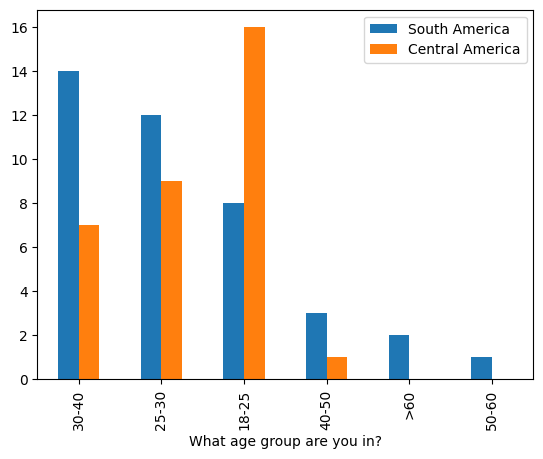

In [11]:
south_age_df = south_df["What age group are you in?"].value_counts(dropna=True).reset_index(name='South America')
central_age_df= central_df["What age group are you in?"].value_counts(dropna=True).reset_index(name='Central America')
combined_age_df = pd.merge(south_age_df, central_age_df, on="What age group are you in?", how="outer").fillna(0).sort_values(by="South America", ascending=False)
combined_age_df.plot(x="What age group are you in?", y=["South America", "Central America"], kind="bar")

The biggest age group in South America was 30-40s. whereas that same age group only represented 21.2% of the respondents in Central America. On the flip side, the biggest % in Central America was 18-25 at almost 50%, whereas the same age group only represented 20% of respondents in South America.

💡 South America is known to be more expensive than Central America, so it makes sense that older people with more money flock there.\
💡 I spent most of my time in SA in hiking clothes, altitudes >4,500m, and in below 10 degree weather. Whereas in central america I was basically in a bikini the entire time. I think it's safe to assume that people in their late twenties-thirties prefer hiking, whereas CA is catching the younger party crowd.

### Work

One of the big questions I wanted to answer was - what kind of job gives someone the freedom to travel? Are these countries full of students or remote workers? Do some industries attract more adventurous people?

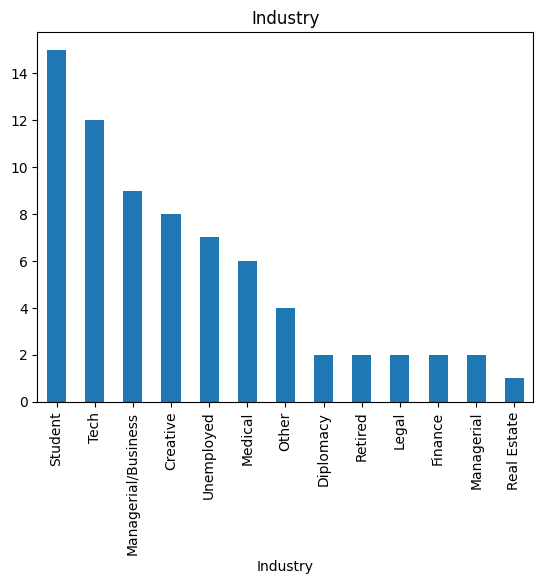

In [12]:
industries = df["Industry"].value_counts(dropna=True).plot(kind="bar", title='Industry')

Upon closer inspection, the distribution varies wildly again between SA and CA.

Overall, most of the respondees were students, but this was heavily concentrated in CA.

🌿 Latin America is a hot spot for American and Canadian students.\
💡 High number of techies in South America is reinforcing an existing stereotype - people in tech love to hike \
🤔 I would have probably met more people in tech if I wasn't so allergic to digital nomad evangalists \
💡 I met a surprising amount of doctors while on the road. Many of them were on locum gigs that paid well and would take months off between jobs to travel.



<AxesSubplot:xlabel='Industry'>

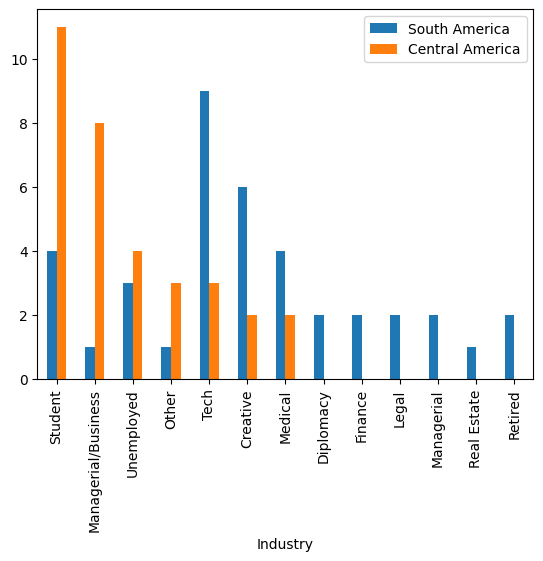

In [13]:
south_industry_df = south_df["Industry"].value_counts(dropna=True).reset_index(name='South America')
central_industry_df= central_df["Industry"].value_counts(dropna=True).reset_index(name='Central America')
combined_industry_df = pd.merge(central_industry_df, south_industry_df, on="Industry", how="outer").fillna(0).sort_values(by="Central America", ascending=False)
combined_industry_df.plot(x="Industry", y=["South America", "Central America"], kind="bar")

I took a free text input for occupation and normalised it to the closest industry manually. So here is a cute word cloud to show you what people were actually saying. See if you can spot your job here:

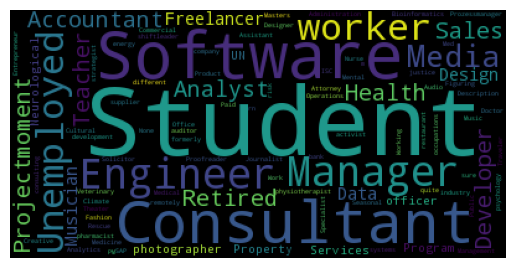

In [14]:
occupation_word_cloud = WordCloud().generate(' '.join(df['What is your occupation?'].dropna()))
plt.imshow(occupation_word_cloud)
plt.axis("off")
plt.show()

# Travelling habits

This section will zoom in more on the responses from travellers, and how they were choosing to travel.\
Results from locals are omitted in this section

## How was I meeting people?

The biggest concern of a first time solo-traveller is: how the hell am I going to make friends? I was anxious about this too.

<AxesSubplot:title={'center':'How did we meet?'}>

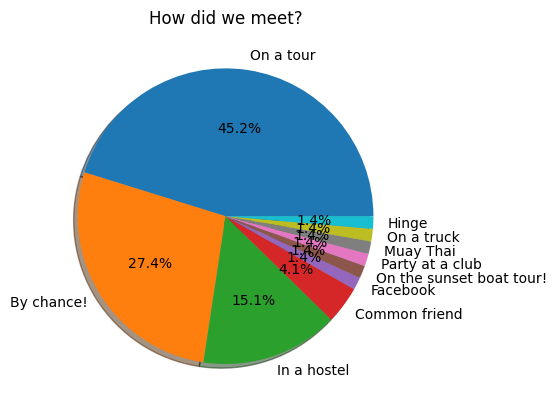

In [15]:
df["How did we meet?"].value_counts(dropna=True).plot(kind="pie", autopct='%1.1f%%', shadow=True, title='How did we meet?', ylabel='')

The top three are

🥇 On a tour! Because of the long travel times, you tend to strike up conversation. It's also a great chance to see what other people are up to and link up for travel buddies. \
🥈 By chance! I realise now this is a really generic category, so it has a high surface area. When i combed through the respondents, the most of them were I met during hikes, in bars, and random places like train stations. Serendipity! \
🥉 In a hostel. Again, other travellers often looking to make friends. I found that there's usually one or two hostels in a city/town which is known for social events (like a full ass calendar with multiple activities or outings a day). There's a big difference between social hostels and party hostels though. The former gives wholesome social vibes, the latter means everything is sticky with alcohol, music is thumping till 3am, and there almost definitely will be people boning in the bunk beds around you (I'm looking at you, Mr Mullets)


Some stories about the random entries \
📕 Hinge - I KNOW THAT'S WHAT YOUR EYES WERE DRAWN TO FIRST! I made a friend on Hinge and they were wackadoodle fun, we went to a Hello Kitty market in CDMX with someone else I met while having lunch (who turned out to be the CFO of DHL Anerucas SSC lmao), they then invited me to come hang out in Mexico's only legally nude beach for a few days which was a riot. Apps can be such a fun way to meet people, if you want it to be more explicitly friendly, try bumble friends, though it's not that big in latin america. Hinge is also basically all people from US/Canada/Europe.\
📕 On a truck - honestly, can't remember who the hell this is HAHA! Maybe I sat in too many trucks \
📕 Facebook - One great resource is FB solo traveller groups. The one I loved the most was Host A Sister, where you could advertise your place to host, ask to be hosted, or just for meetups. I posted my rough itinerary and found a Czech gal who was basicall doing the same stretch for 1.5 weeks who was such a cool babe.\
📕 Muay Thai - I went to a couple of Muay Thai classes while I was travelling which was super fun. Doing a sport is a great way to meet people with common interests. Body language here is more important than speaking the same language!

## Who were people travelling with?

Again, solo traveller anxiety said: what is everyone else is travelling in a couple or with friends?

🤔 Lonely people like lonely people! As you can imagine, solo travellers are more receptive and proactive in meeting people, so it's no surprise that I met mostly solo travellers.

<AxesSubplot:title={'center':'Who are you travelling with?'}>

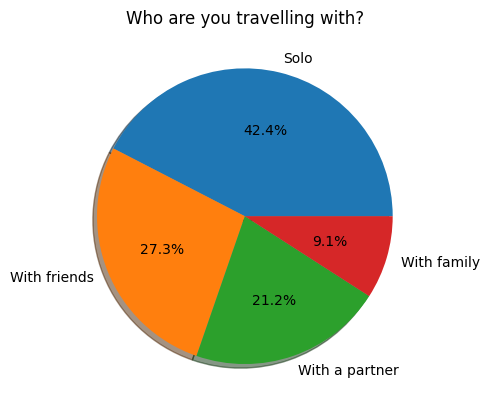

In [16]:
df["Who are you travelling with?"].value_counts(dropna=True).plot(kind="pie", autopct='%1.1f%%', shadow=True, title='Who are you travelling with?', ylabel='')

<AxesSubplot:xlabel='Who are you travelling with?'>

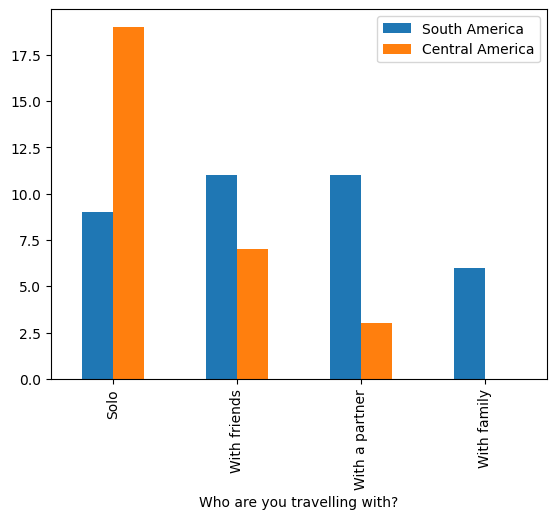

In [17]:
south_travelwith_df = south_df["Who are you travelling with?"].value_counts(dropna=True).reset_index(name='South America')
central_travelwith_df= central_df["Who are you travelling with?"].value_counts(dropna=True).reset_index(name='Central America')
combined_travelwith_df = pd.merge(south_travelwith_df, central_travelwith_df, on="Who are you travelling with?", how="outer").fillna(0).sort_values(by="Central America", ascending=False)
combined_travelwith_df.plot(x="Who are you travelling with?", y=["South America", "Central America"], kind="bar")

Looking again at the SA/CA split we see a different distribution:

💡 Much more even split across the 4 categories in South America. Travelling with families and partners could correlate with the higher age group stat as well.\
💡 Same on the flip side for solo travelling in CA, which is the highest % by far\
🌿 In CA, it felt like there was a well-worn travellers path. I would bump into people weeks after meeting them in another town and find that we took the same route, offset by a day or two. Maybe this makes it easier to undertake as a solo travelling excursion

### Gender distribution for solo travellers

<AxesSubplot:title={'center':'Gender distribution for solo travellers'}>

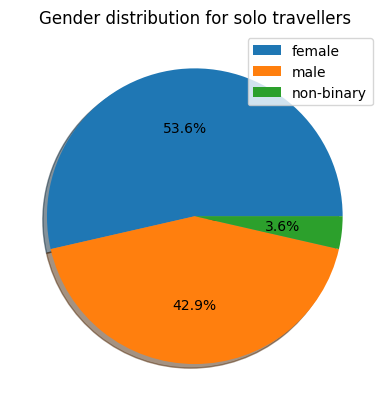

In [18]:
solo_df = df.loc[df['Who are you travelling with?']=="Solo"]
solo_df["What is your gender"].value_counts(dropna=True).plot(kind="pie", autopct='%1.1f%%', shadow=True, legend=True, title='Gender distribution for solo travellers', ylabel='', labeldistance=None)

One of the most unexpected results was that I met more solo female-travellers than male-travellers.

🌿 I noticed that many male backpackers were travelling in groups of friends.

💡 One of the biggest objections I got before I went on this trip was that it was too dangerous to do solo travelling as a woman, and especially in Latin America (whatever the hell that means). So it was great to be in such good company.

📕 On the last week of my trip, I stayed in Tribu Hostel in Holbox, Mexico. I was in a 10-person female dorm, and on my second day there the entire room got to chatting and we planned to explore the island together. The big gaggle of us walked the long length of the beach at high tide and watched the sunset while flamingos grazed on plankton 20 meters away. We ate fancy tacos and then went looking for a lagoon to see the bioluminescent plankton in the dark sky of a new moon. We were stumbling around in the dark when someone's torch shined on a sign that said "crocodiles" and we all ran off screaming. We eventually found the secluded lagoon and spent the night swimming around in the faint blue glow before going back to the hostel in 4x4 trucks with tiny plankton lights on our sunburnt skin.

## Length of travel

Wide range of answers in this one. As many people doing short <2 week trips as there were doing longer multi-month trips. Also awesome to a quarter of respondents doing 3 months or more!

📕 Met a lovely American couple who quit their corporate jobs to do a massive world tour. Think they were doing a few months in SA, then to South East Asia

<AxesSubplot:title={'center':'Trip duration'}>

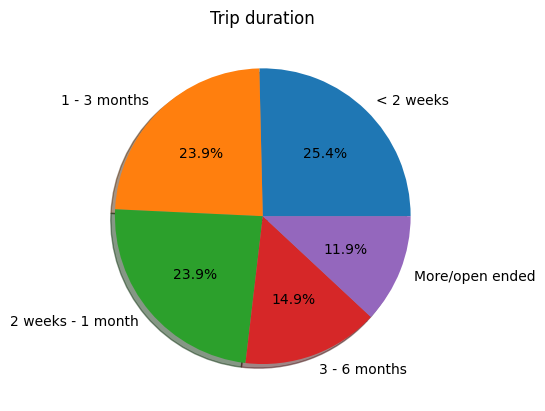

In [19]:
df["How long is your trip?"].value_counts(dropna=True).plot(kind="pie", autopct='%1.1f%%', shadow=True, title='Trip duration', ylabel='')

<AxesSubplot:title={'center':'Countries visiting on this trip'}, xlabel='Countries visited'>

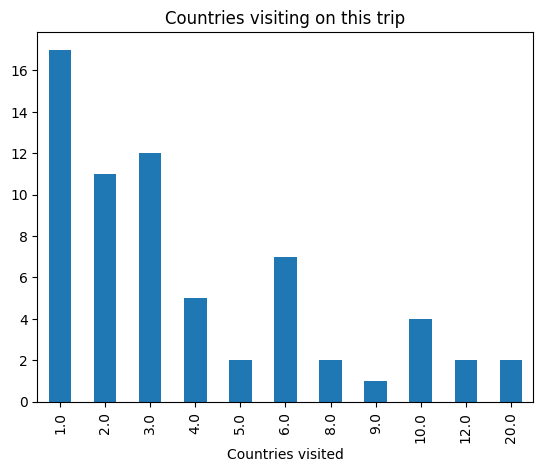

In [20]:
df["Number countries normalised"].value_counts(dropna=True).rename_axis("Countries visited").sort_index(level=1).plot(kind="bar", title='Countries visiting on this trip', ylabel='')

## Travel motivation

I asked people to categorize what kind of trip they were on. The top two categories were career break and annual leave!

📕 One of my favourite people I met was this Chinese-American girl called Irene. She was this super high-achieving career gal who worked in US intelligence and then a biomedical company before she got made redundant. It was a huge leap of faith and change of pace to go from that to basically showing up in Guatemala with zero plans, and an open mind to a different way of life. I have her on Instagram and I can see that she's still out there living her best life. 加油!

<AxesSubplot:title={'center':'Type of trip'}>

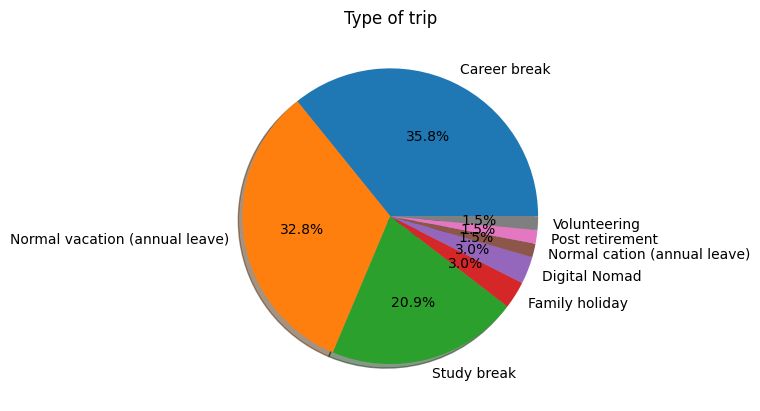

In [21]:
df["What kind of trip is this?"].value_counts(dropna=True).plot(kind="pie", autopct='%1.1f%%', shadow=True, title='Type of trip', ylabel='')

I also had a free text question "Why did you decide to travel". The responses were really lovely, and here's a word cloud to get a general sense of what people were saying

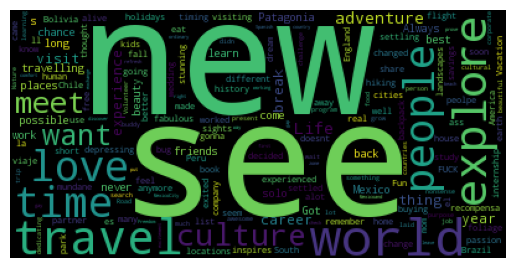

In [22]:
word_str = ' '.join(df['Why did you decide to travel?'].dropna())
useless_words = ["wanted", "need", "well", "go"]
querywords = word_str.split()
resultwords  = [word for word in querywords if word.lower() not in useless_words]
result = ' '.join(resultwords)

motivation_word_cloud = WordCloud().generate(result)
plt.imshow(motivation_word_cloud)
plt.axis("off")
plt.show()

In general, people wanted to explore the world, get out of their comfort zones, and take a break from work. The answers were all really free spirited and inspiring, so take a look at the csv for the raw data if you want to comb through them.

Some of my favourite responses:\
💖 FUCK IT! Wanted to go on an adventure before I settled down\
💖 I was gonna do an internship in Brazil and had some time\
💖 Always wanted to backpack park during fall foliage\
💖 Why not :)\
💖 because I was exited to see the beauty of the earth and to meet people from other cultures\
💖 I got laid off my job… and, we only have the present!!\
💖 Wanted to explore the world and have time to put myself first after years of working\

And my all time favourite one: \
💖 better than England

## Satisfaction level

Going on a big trip like this is scary. What's even scarier is that you might regret it. I asked people how the trip was comparing to their expectations.

Amazingly, not a single respondent said that it was below expectations! Though a few cautious ones said it was too soon to tell. 

If that isn't enough to motivate you to go on that trip - what else will?

🤔 If someone was having a really shit time, would that make them more or less likely to fill this out? Can't tell whether it would make you more likely cause you want to vent or complain, or less likely cause you're miserable and can't be arsed.

<AxesSubplot:title={'center':'Expectation vs reality'}>

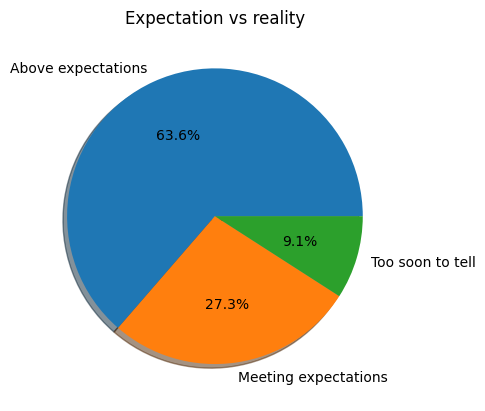

In [23]:
df["How is it comparing to expectations?"].value_counts(dropna=True).plot(kind="pie", autopct='%1.1f%%', shadow=True, title='Expectation vs reality', ylabel='')